<a href="https://colab.research.google.com/github/Sonhoangvo/csgo/blob/main/csgoVNAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, mean_squared_error,r2_score,mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [53]:
data = pd.read_csv('csgo.csv',header = 0)

In [54]:
#Check and choose the features
data.drop(['day','month','year','date','wait_time_s','match_time_s'],axis = 1, inplace = True)


In [55]:
#Sastictics
print(data.head(n=10))
print(data.dtypes)
print(data.describe())

       map  team_a_rounds  team_b_rounds   ping  kills  assists  deaths  mvps  \
0   Mirage           16.0           13.0  215.0   17.0      2.0    21.0   2.0   
1   Mirage           16.0           11.0  199.0   13.0      4.0    24.0   2.0   
2   Mirage           16.0           14.0   85.0   15.0      3.0    18.0   3.0   
3   Mirage           11.0           16.0   93.0   12.0      2.0    15.0   2.0   
4   Mirage           15.0           15.0   94.0   33.0      5.0    20.0   5.0   
5   Mirage           16.0            4.0   88.0   13.0      2.0    17.0   1.0   
6  Dust II           16.0           14.0   89.0   19.0      5.0    24.0   2.0   
7   Mirage           16.0           14.0   82.0   17.0      1.0    25.0   0.0   
8   Mirage           16.0            8.0  112.0   25.0     10.0    12.0   4.0   
9   Mirage            6.0           16.0   89.0   13.0      1.0    17.0   0.0   

   hs_percent  points result  
0         5.0    45.0    Win  
1         0.0    40.0   Lost  
2        26.0  

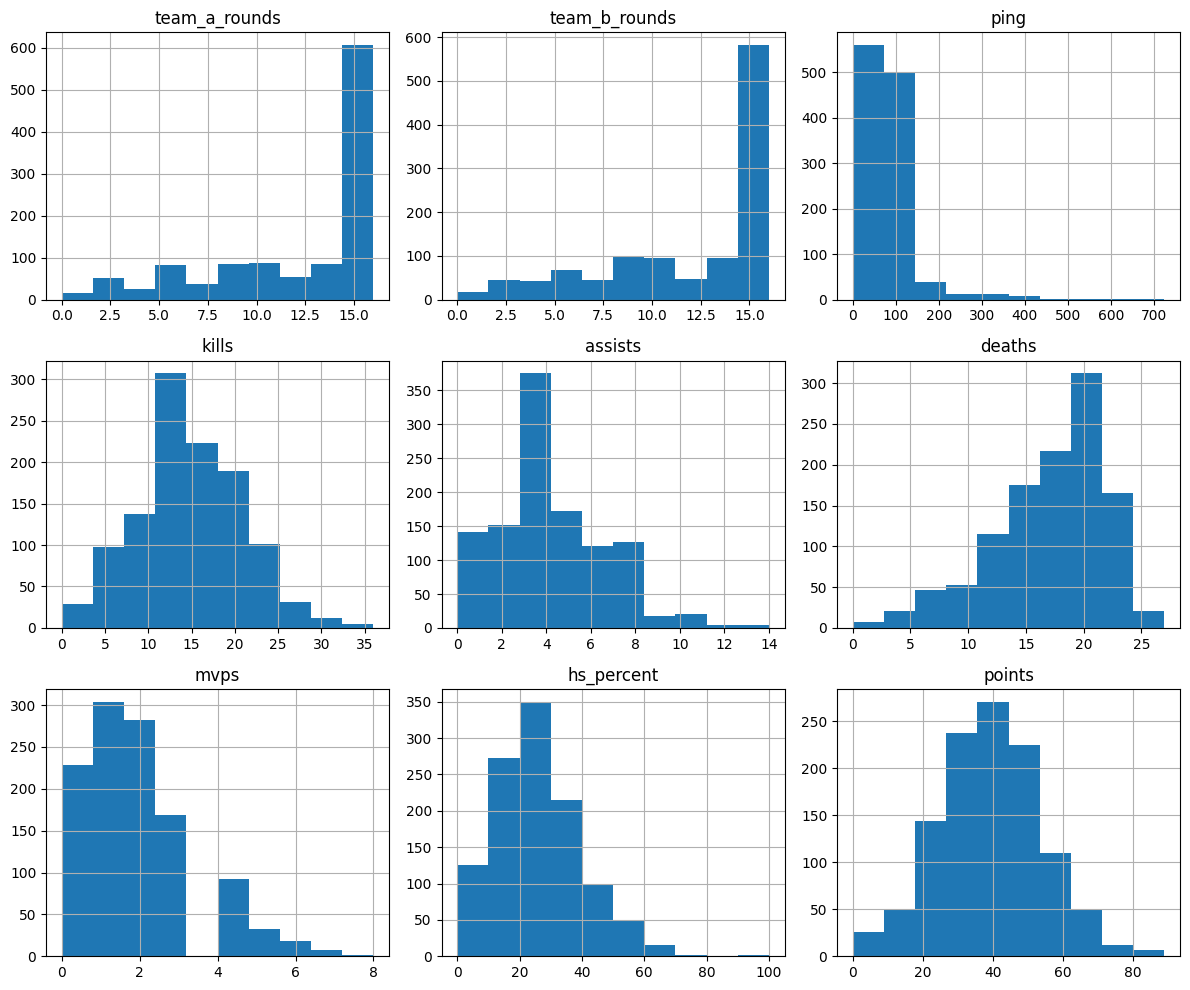

In [56]:
#Data visualization
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


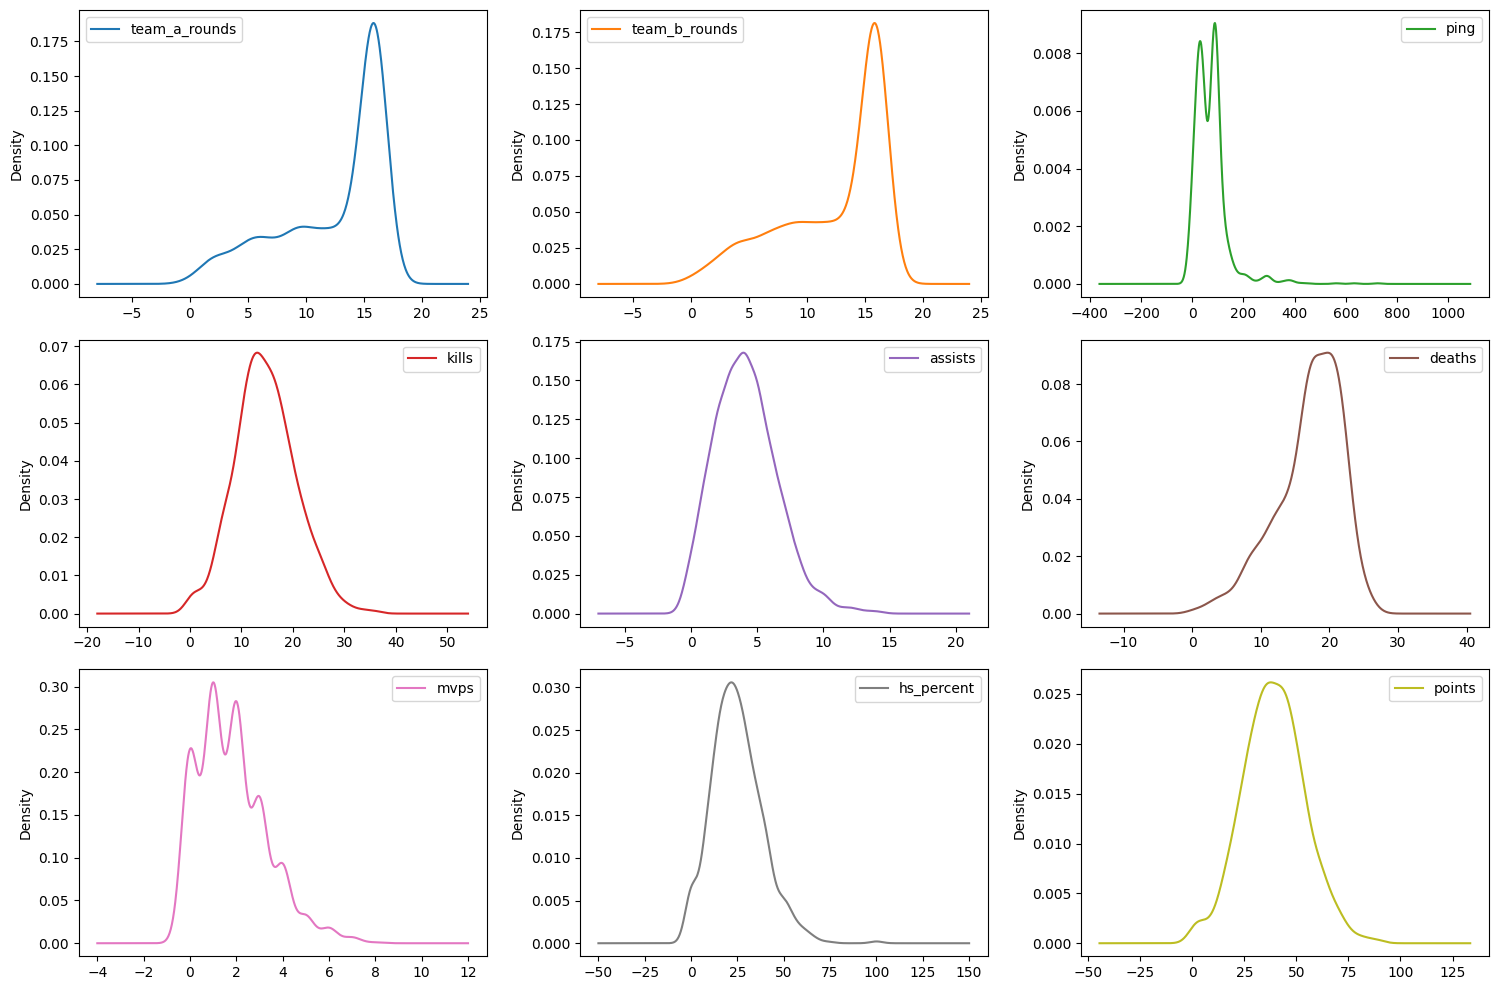

In [57]:
data.plot(kind='density', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

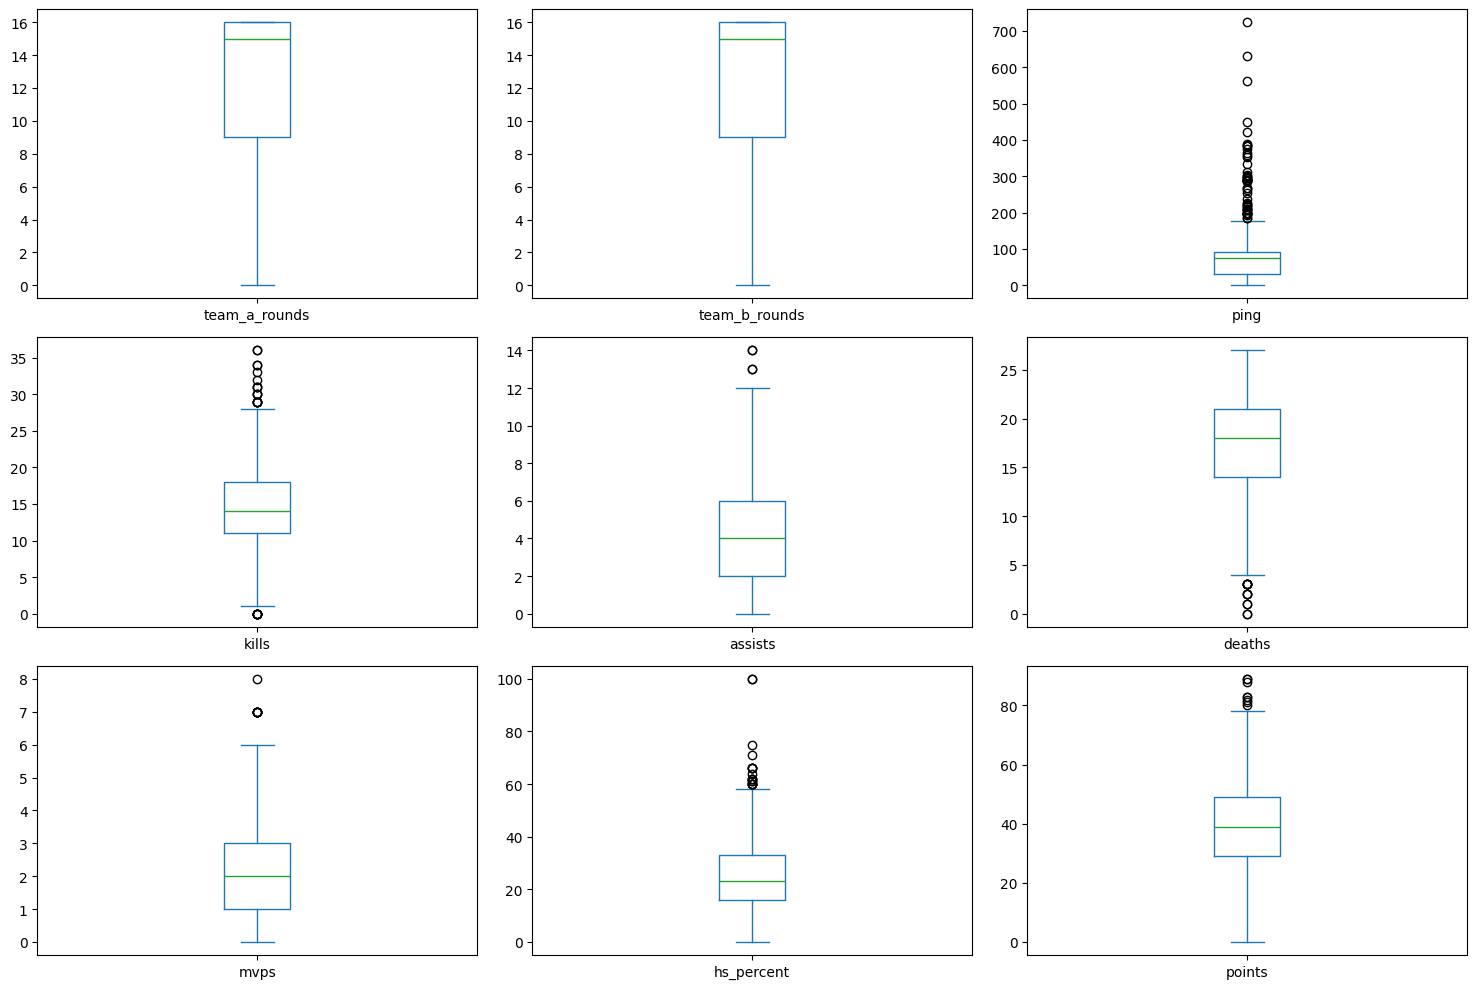

In [58]:
data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

In [59]:
#Preproccess the string data
data['map'].replace({
    'Mirage' : 0,
    'Dust II' : 1,
    'Cache' : 2,
    'Overpass' : 3,
    'Cobblestone' : 4,
    'Inferno' : 5,
    'Austria' : 6,
    'Canals' : 7,
    'Nuke' : 8,
    'Italy' : 9
},inplace = True)

data['result'].replace({
    'Win' : 1,
    'Lost' : 0,
    'Tie' : 2
},inplace = True)

/tmp/ipython-input-59-3387599915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['map'].replace({
/tmp/ipython-input-59-3387599915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['map'].replace({
/tmp/ipython-input-59-3387599915.py:15: FutureWarning: A value is trying to be set on 

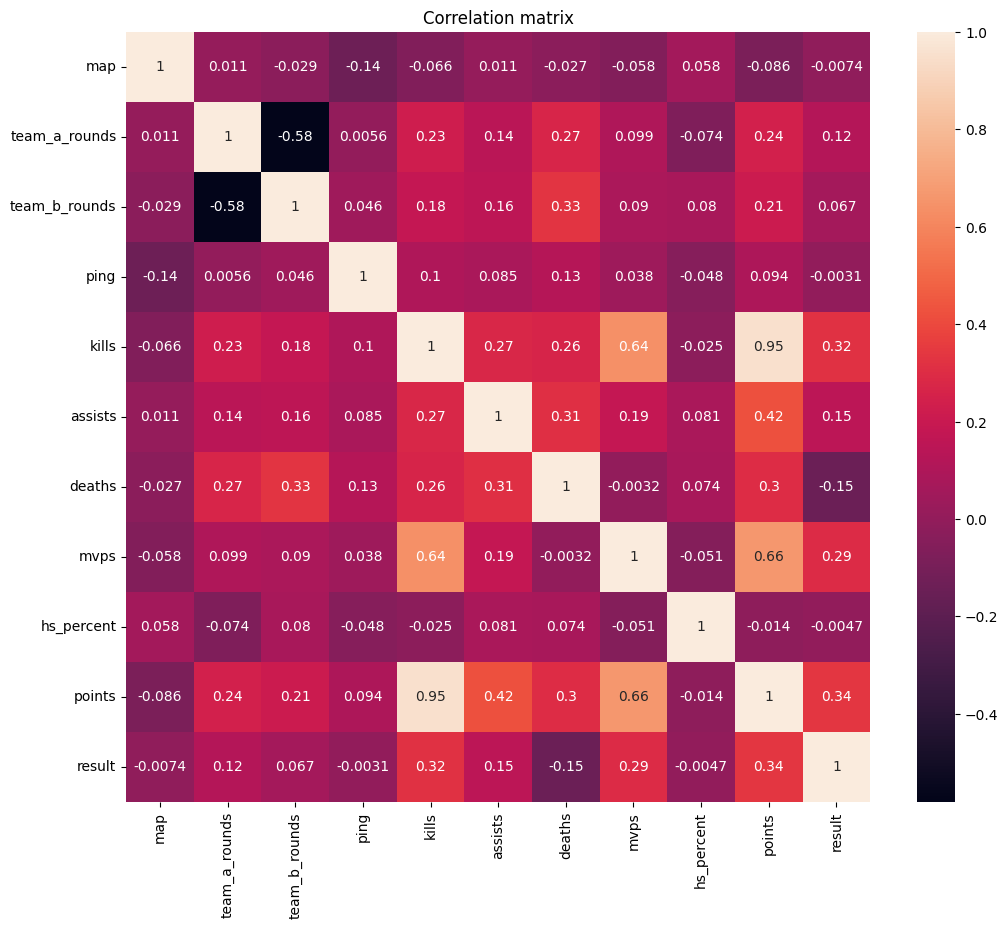

In [60]:
#plot correlation matrix
correlation = data.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation,annot = True)
plt.title('Correlation matrix')
plt.show()

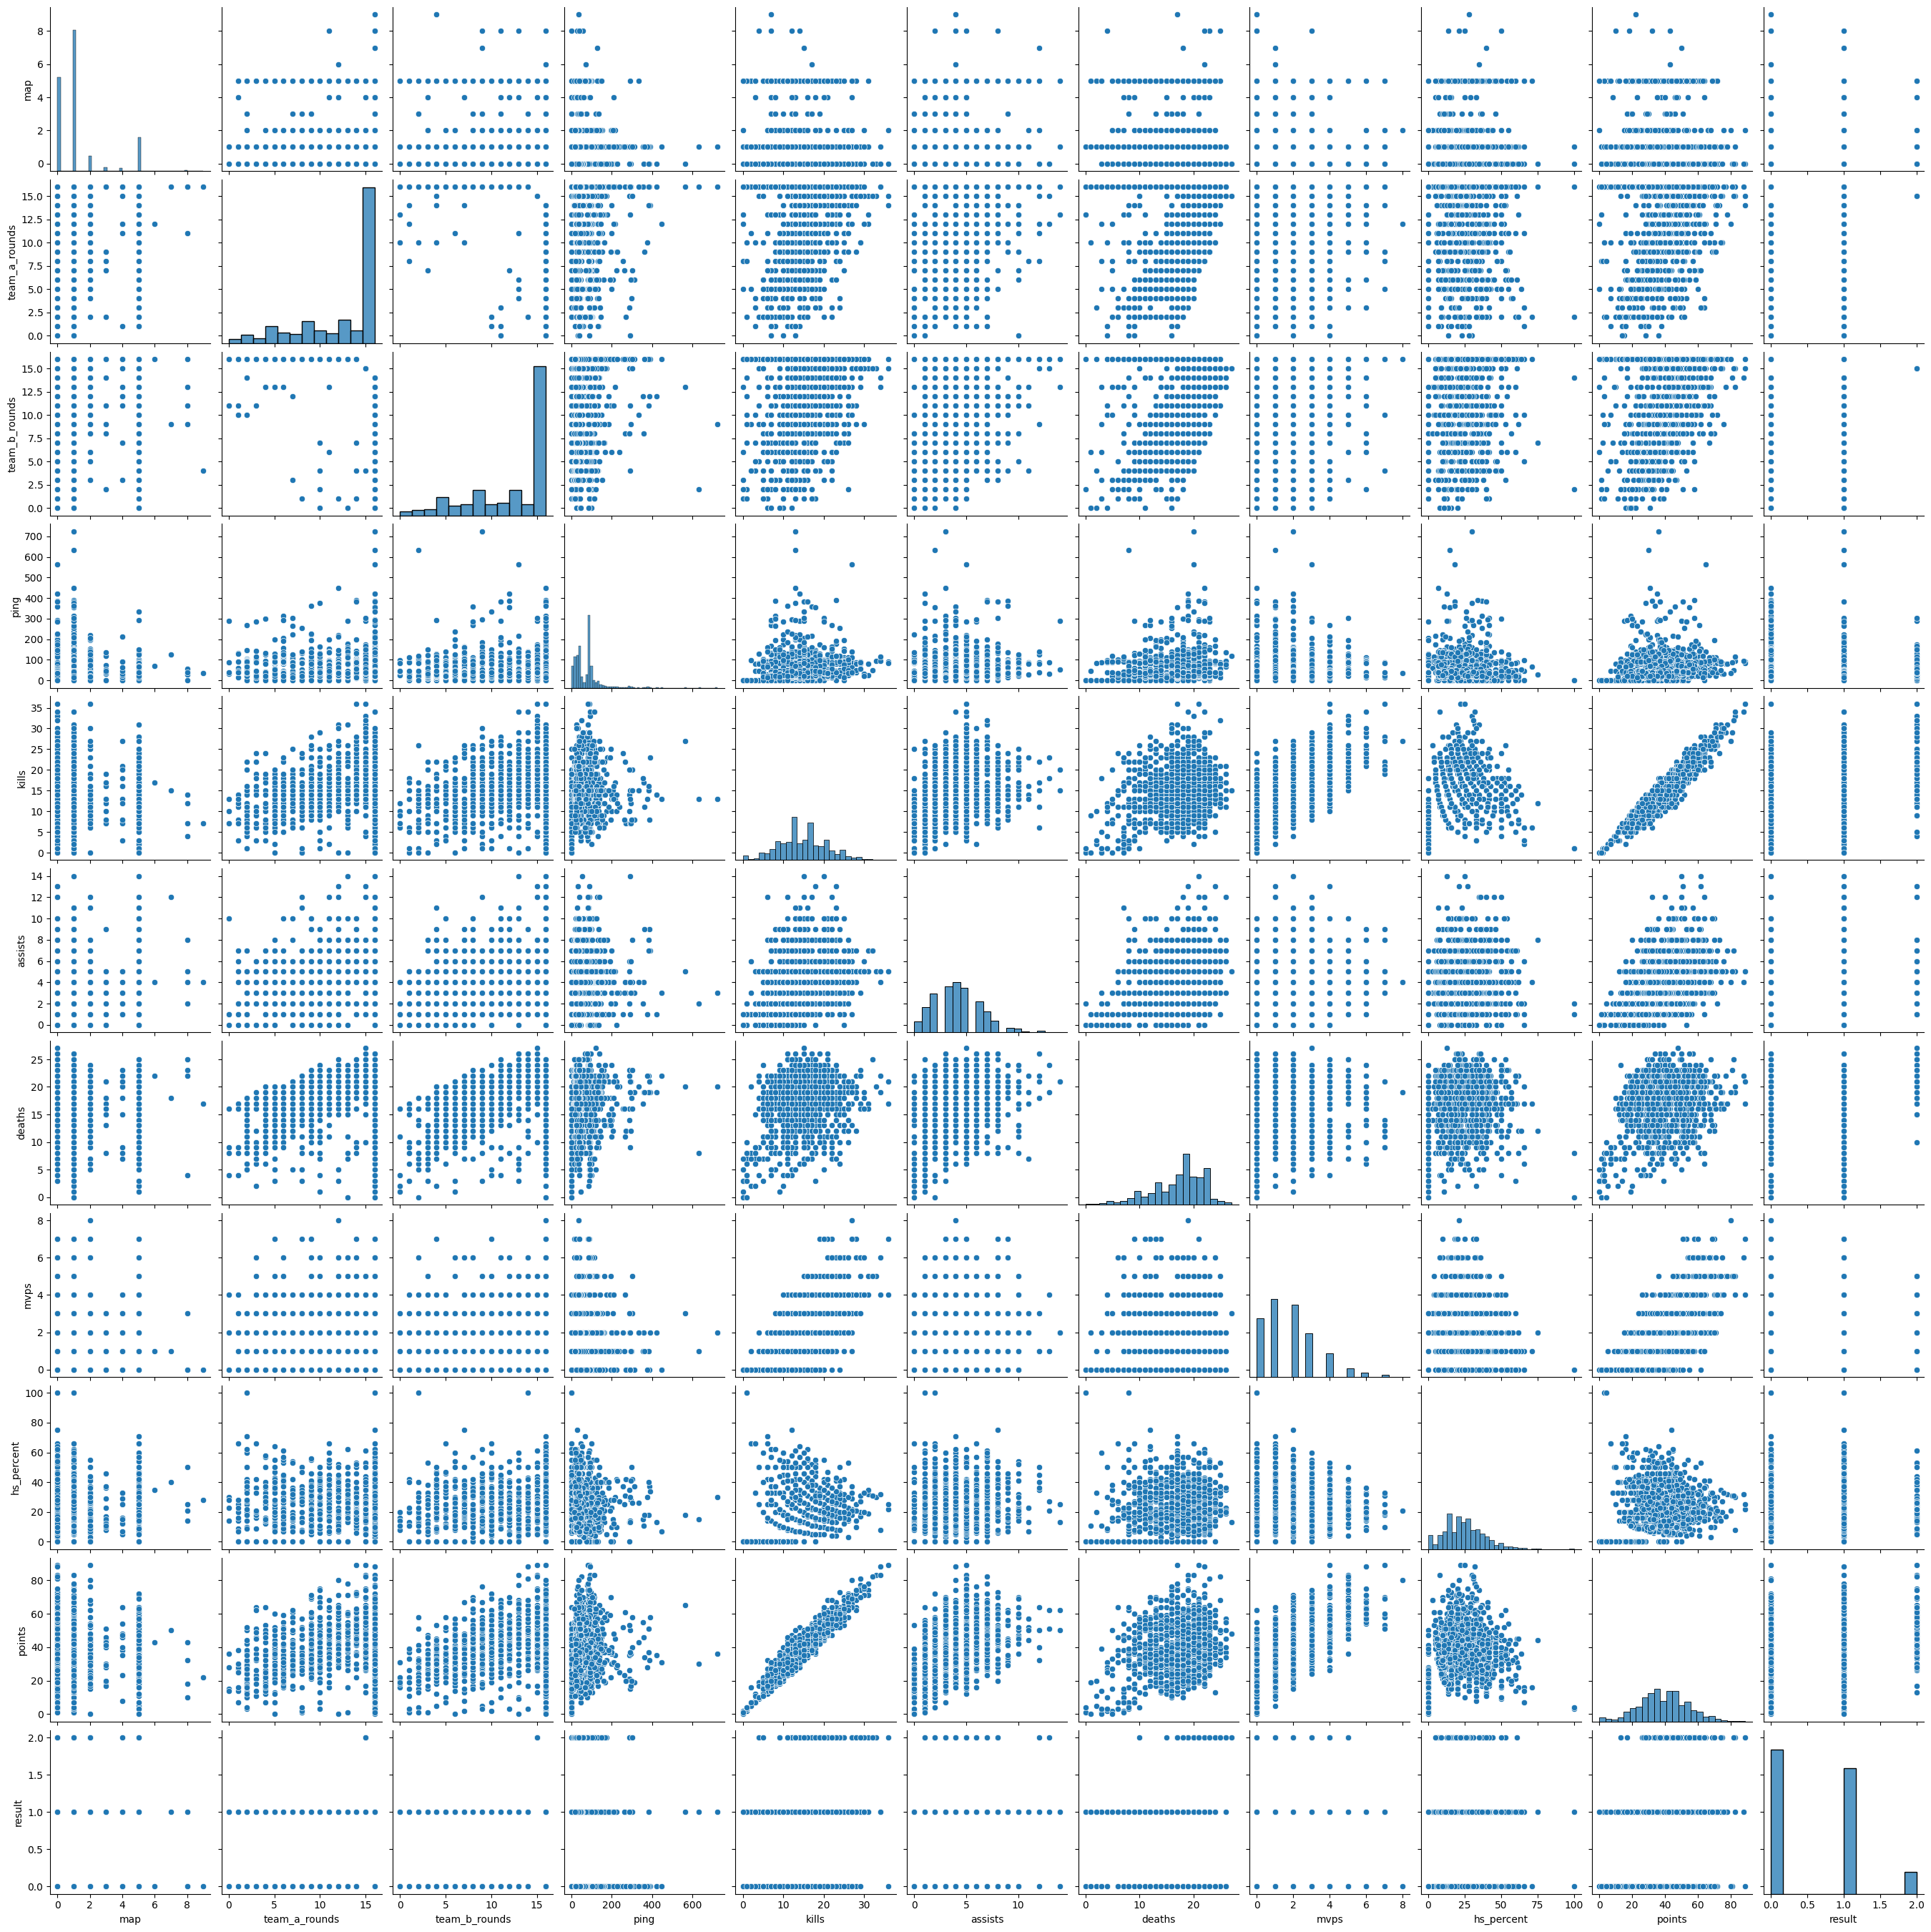

In [61]:
#plot scatter plot
sns.pairplot(data)
plt.show()

In [62]:
#Scale, split and rebalance the data for classifications
x = data.drop('result',axis = 1)
y = data['result']
scale = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [63]:
#Fit and predict the testing set
model = SVC()
model.fit(x_resampled,y_resampled)
predict = model.predict(x_test)


In [64]:
#Print out classification report

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68       105
           1       0.76      0.80      0.78       101
           2       0.39      0.90      0.54        21

    accuracy                           0.70       227
   macro avg       0.66      0.76      0.67       227
weighted avg       0.76      0.70      0.71       227



In [65]:
#Test out multiple parameters for the model
parameters = {
    'kernel':('linear', 'rbf','poly','sigmoid'),
    'C':list(range(1,11)),
    'gamma' : ('scale','auto'),
    }
clf = GridSearchCV(model,parameters, cv = 5, scoring = 'precision_weighted',verbose = 2)
clf.fit(x_resampled,y_resampled)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=scale

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='precision_weighted', verbose=2)

In [66]:
print(clf.best_params_)


{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [67]:
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       105
           1       0.78      0.80      0.79       101
           2       0.37      0.62      0.46        21

    accuracy                           0.72       227
   macro avg       0.64      0.69      0.66       227
weighted avg       0.74      0.72      0.73       227



In [68]:
#Scale and split the data for regression
x = data.drop('points',axis = 1)
y = data['points']
scale = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [69]:
#Import and train the model
linear = LinearRegression()
linear.fit(x_train,y_train)
predict = linear.predict(x_test)


In [70]:
#Evaluate the model
print(math.sqrt(mean_squared_error(y_test,predict)))
print(mean_absolute_error(y_test,predict))
print(r2_score(y_test,predict))


3.7201228757789218
3.0319831174845184
0.9321509428997294


In [71]:
#Dump the model using pickle
file_1 = 'csgo_svc.pkl'
file_2 = 'csgo_linear.pkl'
with open(file_1, 'wb') as file:
    pickle.dump(clf, file)
with open(file_2, 'wb') as file:
    pickle.dump(linear, file)